In [1]:
import pandas as pd
import matplotlib.pyplot as plt
de = pd.read_parquet("../data/processed/daily_energy.parquet")
de.head(), de.ZoneID.nunique(), de.date.min(), de.date.max()


(     ZoneID        date  energy_kwh
 0  BLR-0001  2023-01-02   57.866284
 1  BLR-0001  2023-01-03   53.828780
 2  BLR-0001  2023-01-04   54.480626
 3  BLR-0001  2023-01-05   42.827577
 4  BLR-0001  2023-01-06   48.868679,
 223,
 datetime.date(2023, 1, 2),
 datetime.date(2025, 8, 9))

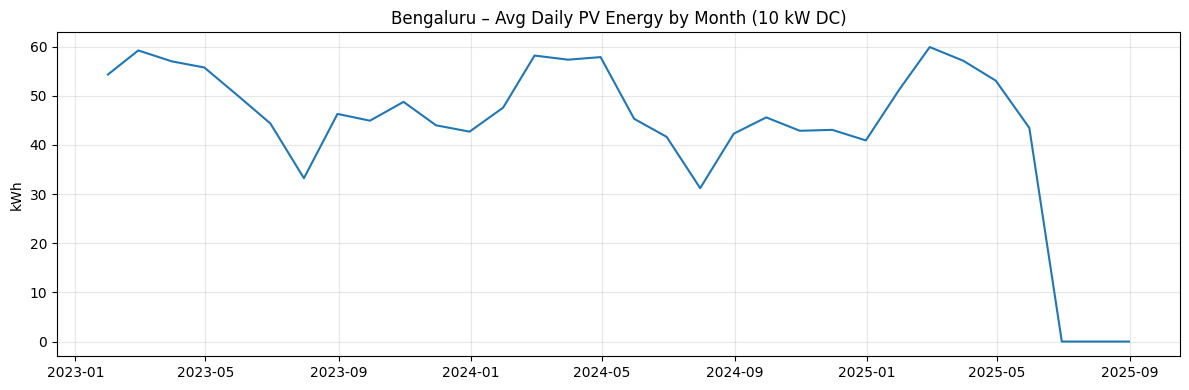

In [6]:
de = de.copy()
de["date"] = pd.to_datetime(de["date"])

m = (
    de.assign(month=de["date"].dt.to_period("M").dt.to_timestamp("M"))
      .groupby("month", as_index=False)["energy_kwh"].mean()
)

plt.figure(figsize=(12,4))
plt.plot(m["month"], m["energy_kwh"])
plt.title("Bengaluru – Avg Daily PV Energy by Month (10 kW DC)")
plt.ylabel("kWh")
plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


In [7]:
# check for zero/negative days (should be rare except very stormy)
(de["energy_kwh"]<=0).value_counts()
# count days kept per zone
per_zone_days = de.groupby("ZoneID")["date"].nunique().describe()
per_zone_days

count    223.0
mean     951.0
std        0.0
min      951.0
25%      951.0
50%      951.0
75%      951.0
max      951.0
Name: date, dtype: float64